In [316]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [317]:
df = pd.read_csv('Corona_unofficial.csv')

In [318]:
df

,Unnamed: 0,case_in_country,reporting date,location,country,gender,age,hosp_visit_date,visiting_Wuhan,from_Wuhan,...,Chills,Body_Pain,difficut_to_breath,Running_nose,Cold,Abdomain_pain,Vomiting,Sore_throat,Malaise,death
0,0,0,20-01-2020,"Shenzhen, Guangdong",China,male,66,11/1/2020,1,0.0,...,0,1,0,0,1,0,1,0,1,0
1,1,0,20-01-2020,Shanghai,China,female,56,15-01-2020,0,1.0,...,1,0,0,1,0,0,1,1,1,0
2,2,0,21-01-2020,Zhejiang,China,male,46,17-01-2020,0,1.0,...,1,1,1,1,1,0,1,1,0,1
3,3,0,21-01-2020,Tianjin,China,female,60,19-01-2020,1,0.0,...,0,0,1,0,0,1,0,1,0,0
4,4,0,21-01-2020,Tianjin,China,male,58,14-01-2020,0,0.0,...,1,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Innsbruck,Austria,Not-specify,24,NaN,0,0.0,...,0,1,1,1,0,1,1,0,1,0
1081,1081,1,24-02-2020,Afghanistan,Afghanistan,Not-specify,35,NaN,0,0.0,...,0,0,0,1,1,1,0,1,0,1
1082,1082,1,26-02-2020,Algeria,Algeria,male,49,NaN,0,0.0,...,0,0,0,0,0,0,0,1,1,1
1083,1083,1,25-02-2020,Croatia,Croatia,male,49,NaN,0,0.0,...,1,1,1,0,0,0,1,1,1,0


In [324]:
#Preprocessing of Data

#Correcting misspelled location
df.iat[74,3] = "Shaanxi"
df.iat[75,3] = "Shaanxi"
df.iat[76,3] = "Shaanxi"
df.iloc[70:90]

#setting a Date format for reporting date column
dff = df['reporting date']
pd.to_datetime(dff)
df.iloc[200:210]

#null values
df.dropna()
df.isnull().sum()

#578 missing values in column hospital visiting date so dropping the column
del df['hosp_visit_date']

#4 missing values in "From Wuhan" column replacing it with the mean value
df.fillna(df.mean(), inplace = True)
df.isnull().sum()


Unnamed: 0            0
case_in_country       0
reporting date        0
location              0
country               0
gender                0
age                   0
visiting_Wuhan        0
from_Wuhan            0
Feaver                0
Cough                 0
Chills                0
Body_Pain             0
difficut_to_breath    0
Running_nose          0
Cold                  0
Abdomain_pain         0
Vomiting              0
Sore_throat           0
Malaise               0
death                 0
dtype: int64

In [325]:
#creating dummy variables
df1= pd.get_dummies(df.gender)
df2= pd.get_dummies(df.location)
df1
df2




,Afghanistan,Aichi Prefecture,Alappuzha,Algeria,Amiens,Andalusia,Annecy,Araq,Arizona,Baden-Wuerttemberg,...,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang,Zhuhai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1081,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
df_final =pd.concat([df,df1,df2], axis = 1)

In [327]:
df_final

,Unnamed: 0,case_in_country,reporting date,location,country,gender,age,visiting_Wuhan,from_Wuhan,Feaver,...,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang,Zhuhai
0,0,0,20-01-2020,"Shenzhen, Guangdong",China,male,66,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,20-01-2020,Shanghai,China,female,56,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,21-01-2020,Zhejiang,China,male,46,0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,21-01-2020,Tianjin,China,female,60,1,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,21-01-2020,Tianjin,China,male,58,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,2,25-02-2020,Innsbruck,Austria,Not-specify,24,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1081,1081,1,24-02-2020,Afghanistan,Afghanistan,Not-specify,35,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1082,1082,1,26-02-2020,Algeria,Algeria,male,49,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1083,1083,1,25-02-2020,Croatia,Croatia,male,49,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
df_final.drop(['country' , 'gender', 'location',  'case_in_country',  'Not-specify', 'Zhuhai' ], axis = 1, inplace = True)
df_final

,Unnamed: 0,reporting date,age,visiting_Wuhan,from_Wuhan,Feaver,Cough,Chills,Body_Pain,difficut_to_breath,...,Washington,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang
0,0,20-01-2020,66,1,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20-01-2020,56,0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,21-01-2020,46,0,1.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,3,21-01-2020,60,1,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,21-01-2020,58,0,0.0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1080,25-02-2020,24,0,0.0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1081,1081,24-02-2020,35,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1082,1082,26-02-2020,49,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1083,1083,25-02-2020,49,0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [329]:
df_final.shape

(1085, 173)

In [330]:
df_final.columns

Index(['Unnamed: 0', 'reporting date', 'age', 'visiting_Wuhan', 'from_Wuhan',
       'Feaver', 'Cough', 'Chills', 'Body_Pain', 'difficut_to_breath',
       ...
       'Washington', 'Wisconsin', 'Wuhan, Hubei', 'Xinjiang', 'Yau Ma Tei',
       'York', 'Yunnan', 'Zabaikalsky', 'Zaragoza', 'Zhejiang'],
      dtype='object', length=173)

In [331]:
#change the name of first column from unnamed to index
df_final.rename(columns = {"Unnamed: 0":"Index"}, inplace = True) 
df_final.columns

Index(['Index', 'reporting date', 'age', 'visiting_Wuhan', 'from_Wuhan',
       'Feaver', 'Cough', 'Chills', 'Body_Pain', 'difficut_to_breath',
       ...
       'Washington', 'Wisconsin', 'Wuhan, Hubei', 'Xinjiang', 'Yau Ma Tei',
       'York', 'Yunnan', 'Zabaikalsky', 'Zaragoza', 'Zhejiang'],
      dtype='object', length=173)

In [332]:
df_final.describe()

,Index,age,visiting_Wuhan,from_Wuhan,Feaver,Cough,Chills,Body_Pain,difficut_to_breath,Running_nose,...,Washington,Wisconsin,"Wuhan, Hubei",Xinjiang,Yau Ma Tei,York,Yunnan,Zabaikalsky,Zaragoza,Zhejiang
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,...,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,542.000000,49.375115,0.176959,0.144311,0.499539,0.489401,0.493088,0.486636,0.473733,0.509677,...,0.000922,0.000922,0.029493,0.002765,0.000922,0.001843,0.017512,0.000922,0.000922,0.000922
std,313.356825,16.092455,0.381810,0.350918,0.500230,0.500118,0.500183,0.500052,0.499540,0.500137,...,0.030359,0.030359,0.169262,0.052535,0.030359,0.042914,0.131228,0.030359,0.030359,0.030359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,542.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,813.000000,58.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1084.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
#check for null values
df_final.isnull().any()


Index             False
reporting date    False
age               False
visiting_Wuhan    False
from_Wuhan        False
                  ...  
York              False
Yunnan            False
Zabaikalsky       False
Zaragoza          False
Zhejiang          False
Length: 173, dtype: bool

In [334]:
X = df_final.drop(['death', 'reporting date'], axis = 1)      #independent Variables
y = df_final['death']      #dependednt variable

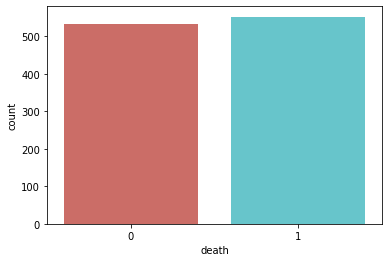

In [335]:
#counting values
df_final['death'].value_counts()

#visualizing data
sns.countplot(x= 'death', data = df_final, palette = 'hls')
plt.show()


In [378]:
#split the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [379]:
reg = LinearRegression()

In [380]:
#training the data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [381]:
df_cofValues = pd.DataFrame(reg.coef_, X.columns, columns = ['Coefficient'])
df_cofValues

,Coefficient
Index,-0.000206
age,-0.000871
visiting_Wuhan,-0.024157
from_Wuhan,-0.089288
Feaver,0.034694
...,...
York,-0.482008
Yunnan,-0.847722
Zabaikalsky,-1.000992
Zaragoza,-0.115911


In [340]:
#predict the values of the model
y_pred = reg.predict(X_test)

In [341]:
df_pred_Act = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred_Act

,Actual,Predicted
58,0,0.605731
416,1,0.479664
271,1,0.327258
250,0,0.382377
391,0,0.462598
...,...,...
332,1,0.413563
444,1,0.636638
420,0,0.334794
1008,0,0.791159


In [342]:
act = df_pred_Act.Actual.mean()
act*0.1

0.048387096774193554

In [343]:
print("RMSE value is: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE value is:  1126242125.3583238


In [344]:
threModel = ((0.1  * 30724422.767732587 )/act)*100
threModel

634971403.8664734

In [359]:
#logistic Regrssion Model
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\Users\saba_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [360]:
log_reg.score(X,y)

0.6046082949308755

In [374]:
pred = log_reg.predict(X_test)
pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [377]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, pred)
classification_report

ValueError: Found input variables with inconsistent numbers of samples: [217, 109]